In [6]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Setup display and plotting options
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Load the dataset
iris = pd.read_csv("Iris.csv")
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
print(iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0            5.10         3.50          1.40         0.20      setosa
1            4.90         3.00          1.40         0.20      setosa
2            4.70         3.20          1.30         0.20      setosa
3            4.60         3.10          1.50         0.20      setosa
4            5.00         3.60          1.40         0.20      setosa
5            5.40         3.90          1.70         0.40      setosa
6            4.60         3.40          1.40         0.30      setosa
7            5.00         3.40          1.50         0.20      setosa
8            4.40         2.90          1.40         0.20      setosa
9            4.90         3.10          1.50         0.10      setosa
10           5.40         3.70          1.50         0.20      setosa
11           4.80         3.40          1.60         0.20      setosa
12           4.80         3.00          1.40         0.10      setosa
13           4.30   

In [7]:
# Check if 'Id' column exists before dropping it
if 'Id' in iris.columns:
    iris_data = iris.drop(['Id'], axis=1)
else:
    iris_data = iris  # Use the original DataFrame if 'Id' is not present

iris_data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [8]:
# Descriptive statistics 
df_summary=iris_data.describe()
df_summary

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.


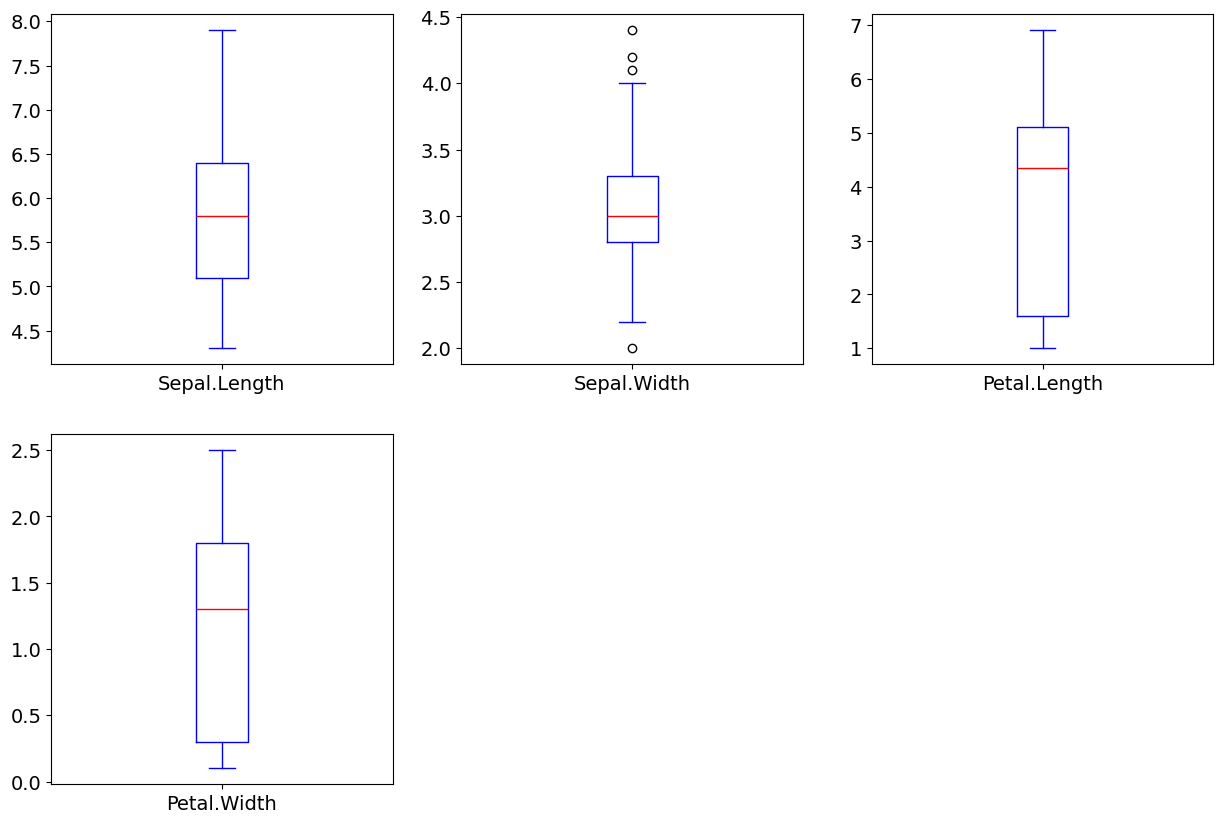

In [9]:
boxplot=iris_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

print('From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.')
print('It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.')

In [10]:
# Correlation Matrix for Iris dataset
iris_data_numeric = iris_data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = iris_data_numeric.corr()
print(correlation_matrix)

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length          1.00        -0.12          0.87         0.82
Sepal.Width          -0.12         1.00         -0.43        -0.37
Petal.Length          0.87        -0.43          1.00         0.96
Petal.Width           0.82        -0.37          0.96         1.00


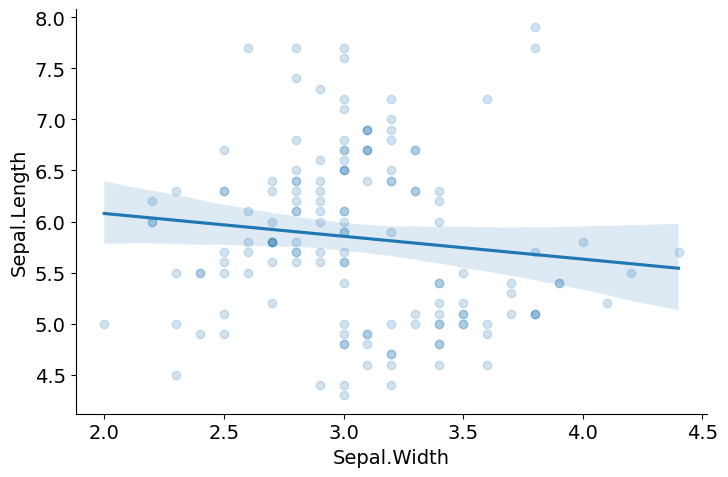

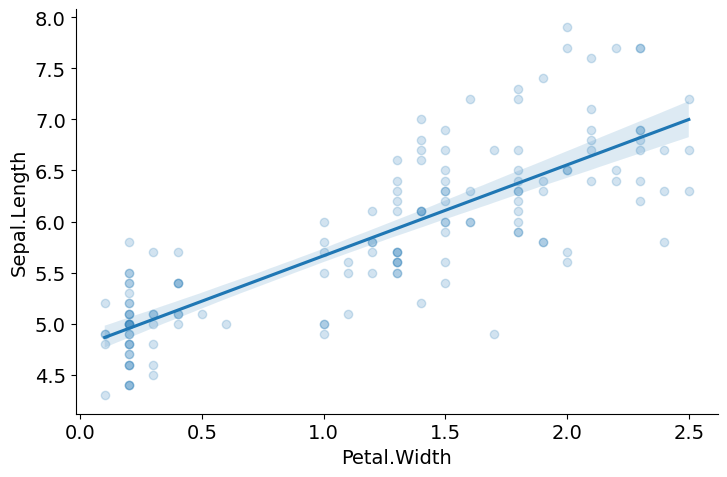

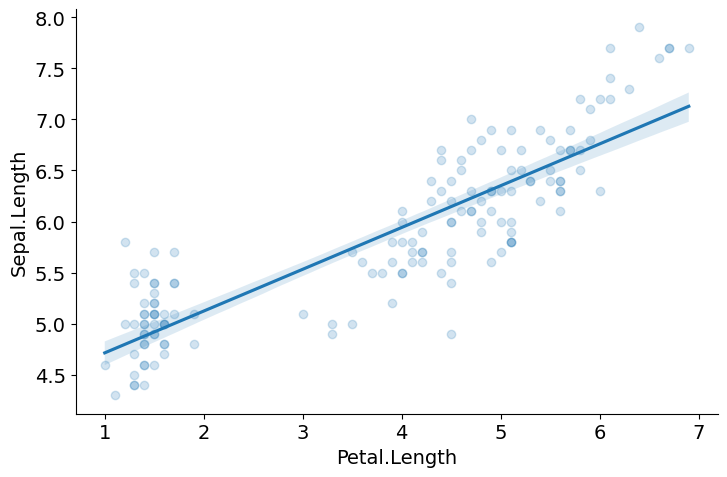

In [11]:
# Scatterplot with best fit line (sesuaikan dengan nama kolom yang benar)
a = sns.lmplot(x='Sepal.Width', y='Sepal.Length', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
b = sns.lmplot(x='Petal.Width', y='Sepal.Length', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
c = sns.lmplot(x='Petal.Length', y='Sepal.Length', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})

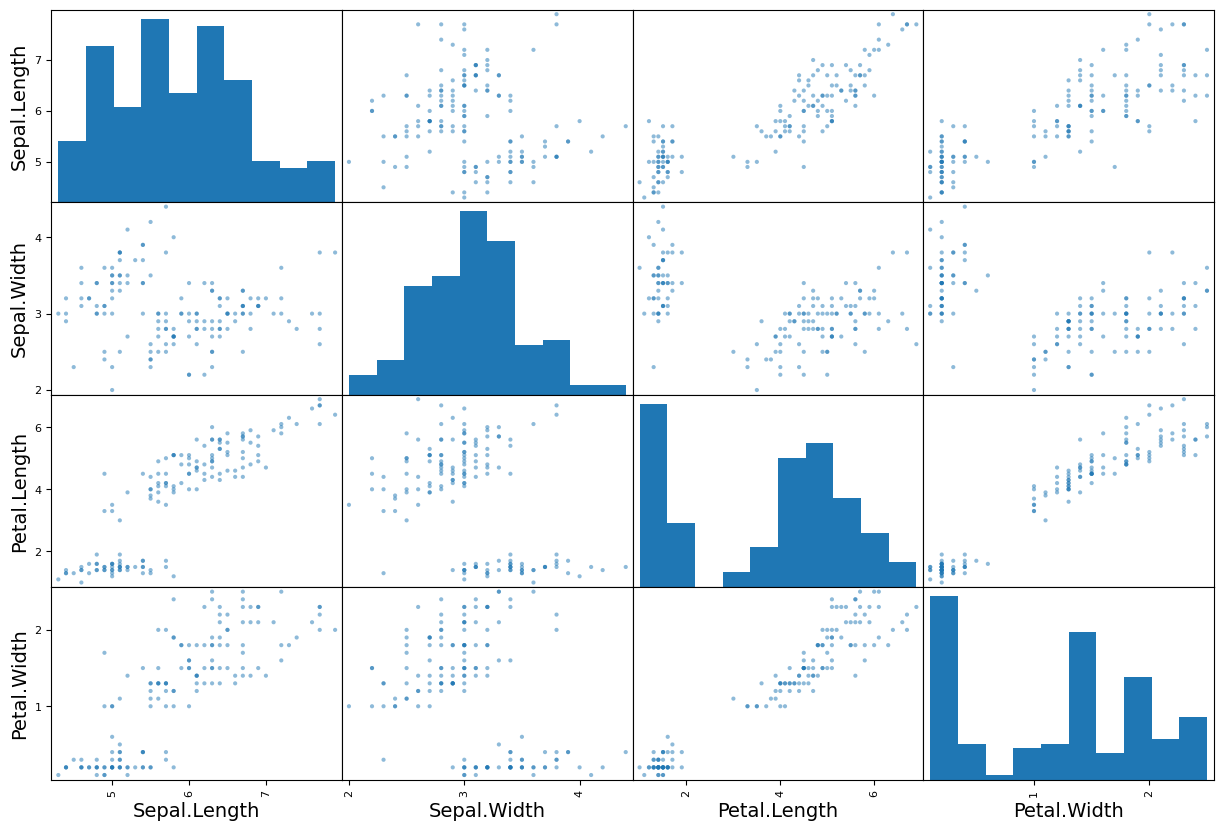

In [12]:
#Combine scatterplot to explore relation b/w sepallength, sepalwidth, petalwidth, petallength

scatter=pd.plotting.scatter_matrix(iris_data,figsize=(15,10))

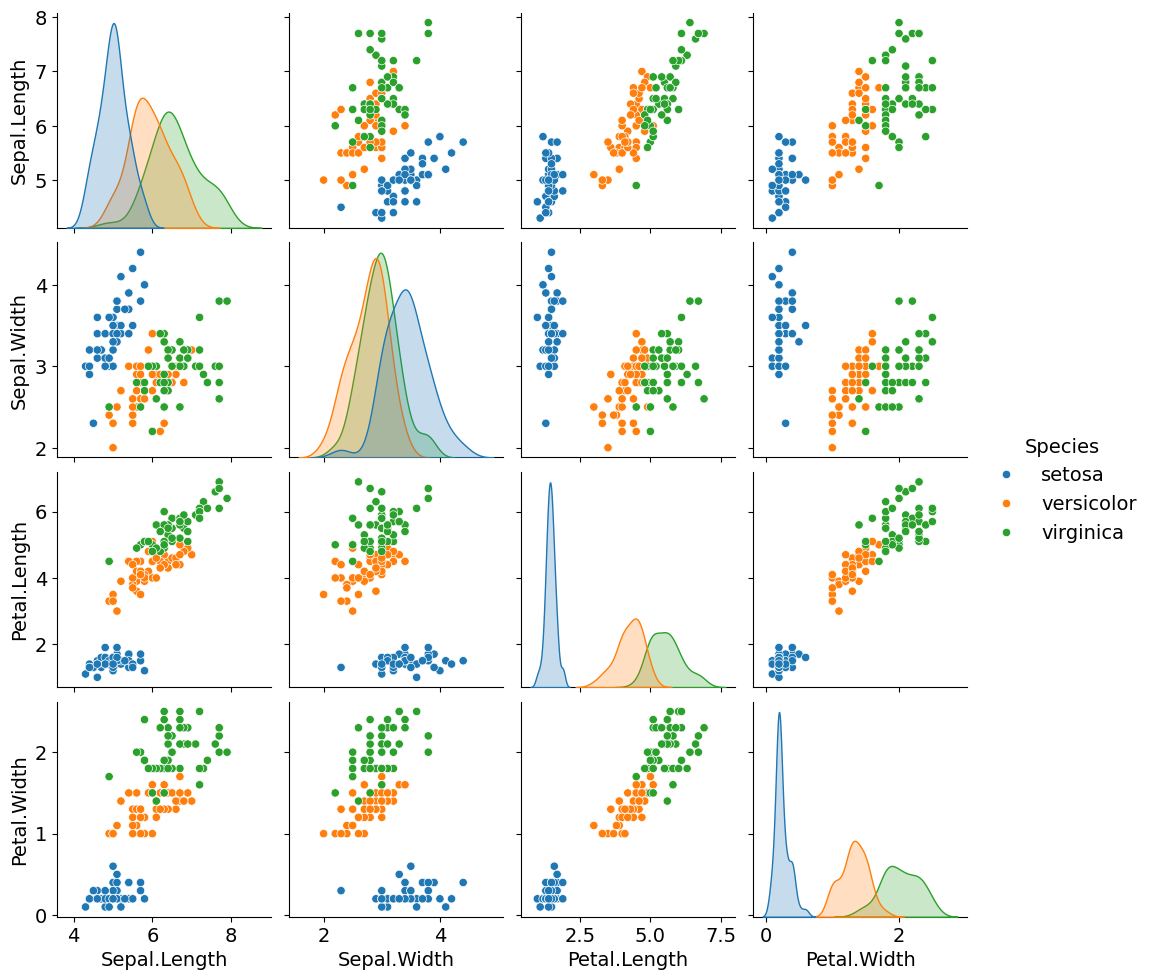

In [13]:
#Scatterplot EDA b/w sepallength, sepalwidth, petalwidth, petallength and how species are reacting to it.

scatterplot=sns.pairplot(iris_data,hue="Species")

In [34]:
input_cols = ['Petal.Length', 'Sepal.Width']
output_variable = ['Sepal.Length']
X = iris_data[input_cols]
y = iris_data[output_variable]
y=iris_data['Sepal.Length']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("Nilai Test:")
print(y_test)
print("Nilai Train:")
print(y_train)


# Buliding the Linear model with the algorithm
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

(105, 2)
(105,)
(45, 2)
(45,)
Nilai Test:
40    5.00
146   6.30
38    4.40
99    5.70
143   6.80
116   6.50
148   6.20
39    5.10
135   7.70
23    5.10
66    5.60
16    5.40
31    5.40
21    5.10
50    7.00
125   7.20
108   6.70
61    5.90
6     4.60
72    6.30
1     4.90
71    6.10
126   6.20
78    6.00
24    4.80
145   6.70
77    6.70
90    5.50
11    4.80
41    4.50
17    5.10
81    5.50
103   6.30
33    5.50
101   5.80
15    5.70
64    5.60
80    5.50
14    5.80
62    6.00
98    5.10
26    5.00
8     4.40
19    5.10
12    4.80
Name: Sepal.Length, dtype: float64
Nilai Train:
10    5.40
46    5.10
36    5.50
124   6.70
7     5.00
132   6.40
85    6.00
52    6.90
63    6.10
48    5.30
111   6.40
92    5.80
91    6.10
120   6.90
9     4.90
113   5.70
5     5.40
144   6.70
106   4.90
114   5.80
138   6.00
86    6.70
57    4.90
93    5.00
83    6.00
105   7.60
0     5.10
140   6.70
131   7.90
34    4.90
94    5.60
18    5.70
115   6.40
122   7.70
43    5.00
51    6.40
69    5.60
29    4.

In [17]:
## Predicting the x_test with the model
predicted=model.predict(X_test)
# Input variable petallength and Sepal width
print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.2445825547323105
MSE: 0.09470106044699889
RMSE: 0.30773537405862017


In [22]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = iris_data[feature_cols]
    y=iris_data['Sepal.Length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# compare different sets of features
print("Train test RMSE between Petal Width, Petal Length, and Sepal Width: ")
print (train_test_rmse(['Petal.Width','Petal.Length', 'Sepal.Width']))
print("Train test RMSE between Petal Width and Sepal Width: ")
print (train_test_rmse(['Petal.Width', 'Sepal.Width']))
print("Train test RMSE Petal Length Sepal Width: ")
print (train_test_rmse(['Petal.Length', 'Sepal.Width']))

Train test RMSE between Petal Width, Petal Length, and Sepal Width: 
0.32394997134367265
Train test RMSE between Petal Width and Sepal Width: 
0.3733221617323695
Train test RMSE Petal Length Sepal Width: 
0.30773537405862017


In [26]:
# define a function that accepts a list of features and returns testing MSE
def train_test_mse(feature_cols):
    X = iris_data[feature_cols]
    y=iris_data['Sepal.Length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_squared_error(y_test, y_pred)
# compare different sets of features
print("Train test MSE between Petal Width, Petal Length, and Sepal Width: ")
print (train_test_mse(['Petal.Width','Petal.Length', 'Sepal.Width']))
print("Train test MSE between Petal Width and Sepal Width: ")
print (train_test_mse(['Petal.Width', 'Sepal.Width']))
print("Train test MSE between Petal Length Sepal Width: ")
print (train_test_mse(['Petal.Length', 'Sepal.Width']))

Train test MSE between Petal Width, Petal Length, and Sepal Width: 
0.10494358393356631
Train test MSE between Petal Width and Sepal Width: 
0.13936943644052943
Train test MSE between Petal Length Sepal Width: 
0.09470106044699889


In [27]:
# define a function that accepts a list of features and returns testing MAE
def train_test_mae(feature_cols):
    X = iris_data[feature_cols]
    y=iris_data['sepal.length']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)
# compare different sets of features
print("Train test MAE between Petal Width, Petal Length, and Sepal Width: ")
print (train_test_mse(['Petal.Width','Petal.Length', 'Sepal.Width']))
print("Train test MAE between Petal Width and Sepal Width: ")
print (train_test_mse(['Petal.Width', 'Sepal.Width']))
print("Train test MAE between Petal Length, and Sepal Width: ")
print (train_test_mse(['Petal.Length', 'Sepal.Width']))

Train test MAE between Petal Width, Petal Length, and Sepal Width: 
0.10494358393356631
Train test MAE between Petal Width and Sepal Width: 
0.13936943644052943
Train test MAE between Petal Length, and Sepal Width: 
0.09470106044699889


In [28]:
# create dummy variables
Species_dummies = pd.get_dummies(iris_data.Species, prefix='Species')

# print 5 random rows from seed value 12
Species_dummies.sample(n=5, random_state=12)
Species_dummies.drop(Species_dummies .columns[0], axis=1, inplace=True)
iris_data = pd.concat([iris_data, Species_dummies], axis=1)
iris_data.head()
#iris_data.sample(n=5, random_state=12)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_versicolor,Species_virginica
0,5.10,3.50,1.40,0.20,setosa,False,False
1,4.90,3.00,1.40,0.20,setosa,False,False
2,4.70,3.20,1.30,0.20,setosa,False,False
3,4.60,3.10,1.50,0.20,setosa,False,False
4,5.00,3.60,1.40,0.20,setosa,False,False


In [29]:
# Membuat variabel dummy untuk kolom 'Species'
iris_data_dummies = pd.get_dummies(iris_data, columns=['Species'])

# Menghapus kolom duplikat, jika ada
iris_data_dummies = iris_data_dummies.loc[:, ~iris_data_dummies.columns.duplicated()]

# Menghitung korelasi
correlation_matrix = iris_data_dummies.corr()

# Menampilkan matriks korelasi dengan style dan dua angka desimal
correlation_matrix.style.background_gradient(cmap="coolwarm").format(precision=2)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_versicolor,Species_virginica,Species_setosa
Sepal.Length,1.00,-0.12,0.87,0.82,0.08,0.64,-0.72
Sepal.Width,-0.12,1.00,-0.43,-0.37,-0.47,-0.14,0.60
Petal.Length,0.87,-0.43,1.00,0.96,0.20,0.72,-0.92
Petal.Width,0.82,-0.37,0.96,1.00,0.12,0.77,-0.89
Species_versicolor,0.08,-0.47,0.20,0.12,1.00,-0.50,-0.50
Species_virginica,0.64,-0.14,0.72,0.77,-0.50,1.00,-0.50
Species_setosa,-0.72,0.60,-0.92,-0.89,-0.50,-0.50,1.00


2.5847512566201143
[('Petal.Length', np.float64(0.8600986685451144)), ('Sepal.Width', np.float64(0.33573776473572225)), ('Species_versicolor', np.float64(-1.2610221443997705)), ('Species_virginica', np.float64(-1.7880046002024343))]


Predicted value of Sepal length: [4.8779617  5.93658441 4.71009282 5.79019939 6.94568965 6.53450263
 6.58278787 5.01640766 7.05056183 5.15485362 6.20138641 5.01225681
 5.01640766 5.11712899 6.4405537  7.03169951 6.62466335 5.94335681
 4.93039779 6.377557   4.79610269 5.70418953 5.86528601 6.16781264
 5.36044713 6.27647303 6.63143575 5.98108144 5.10241753 4.47507638
 4.96397157 5.31186482 6.58693872 5.198988   6.08974183 5.35214542
 5.39372384 5.39787469 4.95982072 5.50274687 4.74336953 5.10241753
 4.76252891 5.15070277 4.79610269]


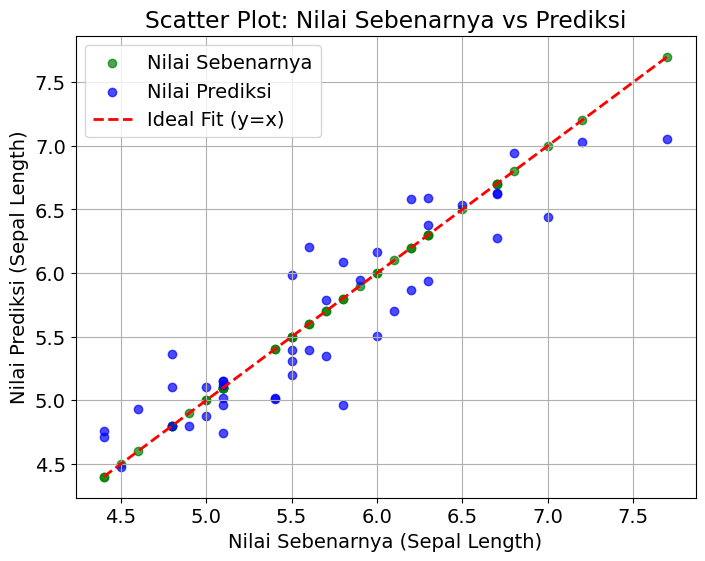

In [30]:
feature_dummies1 =['Petal.Length', 'Sepal.Width', 'Species_versicolor','Species_virginica']

# create X and y
X = iris_data[feature_dummies1]
y = iris_data['Sepal.Length']

# instantiate and fit

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the coefficients
print (linreg.intercept_)
print (list(zip(feature_dummies1, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of Sepallength

print('Predicted value of Sepal length:', y_pred)

y_test_value = y_test
y_pred_value = y_pred

# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter nilai sebenarnya
plt.scatter(y_test_value, y_test_value, color="green", alpha=0.7, label="Nilai Sebenarnya")

# Scatter nilai prediksi
plt.scatter(y_test_value, y_pred_value, color="blue", alpha=0.7, label="Nilai Prediksi")

# Garis referensi ideal
plt.plot([min(y_test_value), max(y_test_value)], [min(y_test_value), max(y_test_value)], 'r--', linewidth=2, label="Ideal Fit (y=x)")

# Label dan judul
plt.xlabel("Nilai Sebenarnya (Sepal Length)")
plt.ylabel("Nilai Prediksi (Sepal Length)")
plt.title("Scatter Plot: Nilai Sebenarnya vs Prediksi")
plt.legend()
plt.grid()
plt.show()

2.291625882995569
[('Petal.Width', np.float64(0.2920786150959263)), ('Sepal.Width', np.float64(0.7719366307365833)), ('Species_versicolor', np.float64(1.1218238468384822)), ('Species_virginica', np.float64(1.39831125398087))]


Predicted value: [5.08102768 6.17472808 4.6658515  5.9545745  6.83191517 6.53148854
 6.9863025  4.97462615 6.67752784 4.98505607 6.16737754 5.41901019
 5.03304187 5.26462286 6.29255701 6.68587586 6.14552022 6.16737754
 5.00383401 5.78140923 4.6658515  5.9545745  6.37710121 6.09018388
 4.97462615 6.67752784 6.22579327 5.77097931 4.97462615 4.15470372
 5.08102768 5.55817626 6.45429487 5.59217546 6.32911541 5.8049785
 6.03176816 5.58738412 5.43778813 5.40378893 5.66457778 5.03304187
 4.58865784 5.31260866 4.63664364]


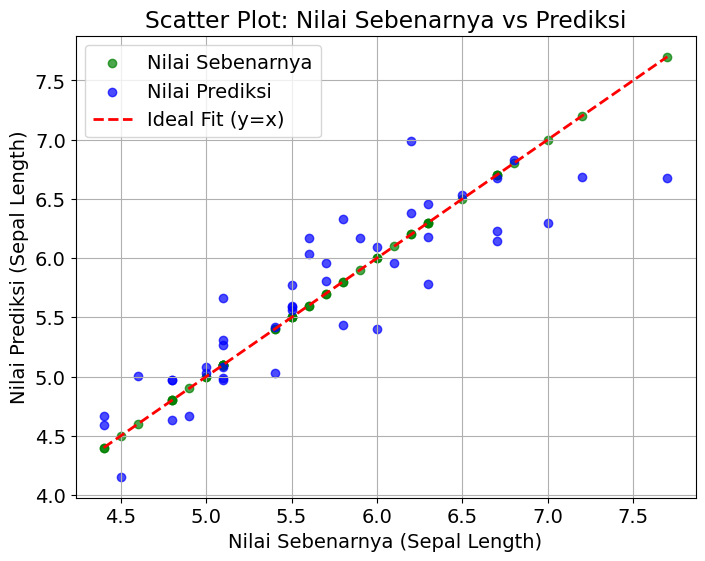

In [31]:
feature_dummies2 =['Petal.Width','Sepal.Width', 'Species_versicolor','Species_virginica']

# create X and y
X = iris_data[feature_dummies2]
y = iris_data['Sepal.Length']

# instantiate and fit

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the coefficients
print (linreg.intercept_)
print (list(zip(feature_dummies2, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of Sepallength

print('Predicted value:', y_pred)

# Nilai sebenarnya dan prediksi
y_test_value = y_test # Contoh nilai sebenarnya
y_pred_value = y_pred
# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter nilai sebenarnya
plt.scatter(y_test_value, y_test_value, color="green", alpha=0.7, label="Nilai Sebenarnya")

# Scatter nilai prediksi
plt.scatter(y_test_value, y_pred_value, color="blue", alpha=0.7, label="Nilai Prediksi")

# Garis referensi ideal
plt.plot([min(y_test_value), max(y_test_value)], [min(y_test_value), max(y_test_value)], 'r--', linewidth=2, label="Ideal Fit (y=x)")

# Label dan judul
plt.xlabel("Nilai Sebenarnya (Sepal Length)")
plt.ylabel("Nilai Prediksi (Sepal Length)")
plt.title("Scatter Plot: Nilai Sebenarnya vs Prediksi")
plt.legend()
plt.grid()
plt.show()

2.2664397277396153
[('Petal.Length', np.float64(0.9212783363307789)), ('Petal.Width', np.float64(-0.3899837087020832)), ('Sepal.Width', np.float64(0.4277507692360096)), ('Species_versicolor', np.float64(-0.942906763969626)), ('Species_virginica', np.float64(-1.2923092448412847))]


Predicted value: [4.84423414 5.90893004 4.66935713 5.79149748 6.8815126  6.62244296
 6.50642358 5.02471311 6.98021811 5.04919858 6.16756222 4.97633608
 4.94671636 5.07504159 6.47636641 7.16863229 6.68495108 5.89117872
 4.8935869  6.32219817 4.76148496 5.69936964 5.89199798 6.12478714
 5.39322444 6.15106761 6.55020465 6.02132919 5.11684094 4.33093322
 4.93636198 5.36888095 6.67179572 5.27478589 6.08660803 5.37446713
 5.37363338 5.42201041 5.00498007 5.55971429 4.72776282 5.0388442
 4.71870989 5.15681504 4.80048334]


This model is not effective due to multicollinearity b/w the independent variables, petal length and width.


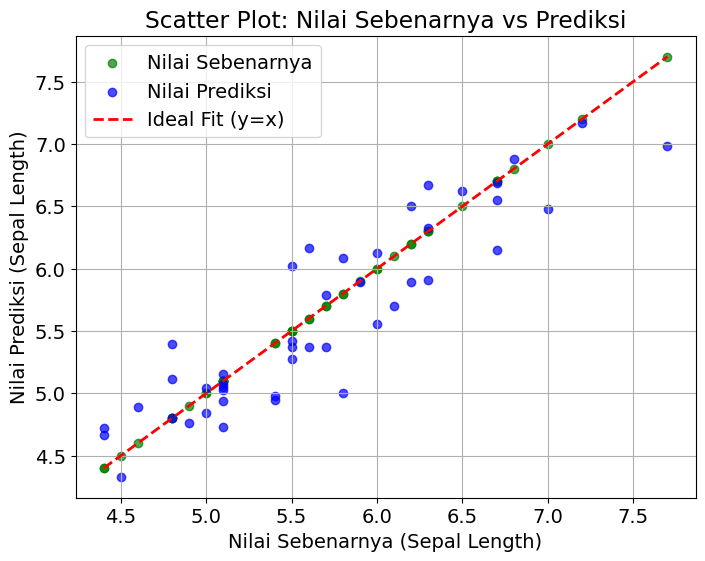

In [32]:
feature_dummies3 =['Petal.Length', 'Petal.Width','Sepal.Width', 'Species_versicolor','Species_virginica']

# create X and y
X = iris_data[feature_dummies3]
y = iris_data['Sepal.Length']

# instantiate and fit

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)



# print the coefficients
print (linreg.intercept_)
print (list(zip(feature_dummies3, linreg.coef_)))
#print (linreg.coef_)

print('\n')

# the predicted value of Sepallength

print('Predicted value:', y_pred)

print('\n')

print('This model is not effective due to multicollinearity b/w the independent variables, petal length and width.')
# Data untuk scatter plot
y_test_value = y_test 
y_pred_value = y_pred

# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter untuk nilai sebenarnya
plt.scatter(y_test_value, y_test_value, color="green", alpha=0.7, label="Nilai Sebenarnya")

# Scatter untuk nilai prediksi
plt.scatter(y_test_value, y_pred_value, color="blue", alpha=0.7, label="Nilai Prediksi")

# Garis referensi ideal (y=x)
plt.plot([min(y_test_value), max(y_test_value)], [min(y_test_value), max(y_test_value)], 'r--', linewidth=2, label="Ideal Fit (y=x)")

# Label dan judul
plt.xlabel("Nilai Sebenarnya (Sepal Length)")
plt.ylabel("Nilai Prediksi (Sepal Length)")
plt.title("Scatter Plot: Nilai Sebenarnya vs Prediksi")
plt.legend()
plt.grid()
plt.show()

In [33]:
print (train_test_rmse(['Petal.Length', 'Species_versicolor','Species_virginica','Sepal.Width']))
print (train_test_rmse(iris_data.columns[iris_data.columns.str.startswith('Species_')]))
print (train_test_rmse(['Petal.Width', 'Species_versicolor','Species_virginica','Sepal.Width']))

print('\n')

print('We can see among the calculated rmse value, the least rmse value is for the petal length, species_ and it is better than other rmse value. So, model#1 it is a best model to consider.')

0.3270889822583467
0.4534843521508059
0.3633722174565253


We can see among the calculated rmse value, the least rmse value is for the petal length, species_ and it is better than other rmse value. So, model#1 it is a best model to consider.


In [1]:
#FUNCTION TO PREDICT TYPE OF IRIS FLOWER BASED ON USER INPUT
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

X = data[iris.feature_names]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for class_label in np.unique(y):
    y_train_binary = (y_train == class_label).astype(int)
    
    model = LinearRegression()
    model.fit(X_train, y_train_binary)
    models.append(model)

predictions = []
for model in models:
    predictions.append(model.predict(X_test))

predictions = np.array(predictions).T  
y_pred = np.argmax(predictions, axis=1) 

print("Akurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

def predict_iris():
    print("\nMasukkan nilai fitur berikut:")
    try:
        sepal_length = float(input("Sepal Length (cm): "))
        sepal_width = float(input("Sepal Width (cm): "))
        petal_length = float(input("Petal Length (cm): "))
        petal_width = float(input("Petal Width (cm): "))
    except ValueError:
        print("Input harus berupa angka. Silakan coba lagi.")
        return
    
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=iris.feature_names)
    
    scores = [model.predict(input_data)[0] for model in models]
    predicted_class = np.argmax(scores)  # Pilih kelas dengan skor tertinggi
    predicted_label = iris.target_names[predicted_class]
    
    print(f"\nHasil prediksi: Bunga Iris termasuk ke dalam jenis '{predicted_label}'.")
    print(f"Skor prediksi per kelas: {scores}")

predict_iris()


Akurasi model: 0.8666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.67      0.75         9
   virginica       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30


Masukkan nilai fitur berikut:


Sepal Length (cm):  5.3
Sepal Width (cm):  2.4
Petal Length (cm):  1.2
Petal Width (cm):  0.5



Hasil prediksi: Bunga Iris termasuk ke dalam jenis 'setosa'.
Skor prediksi per kelas: [np.float64(0.7181074601734129), np.float64(0.49160425615186143), np.float64(-0.20971171632527486)]
